Nama: Justin Martinus

NPM: 2106724832

Mata Kuliah: Data Mining and BI

#Importing

In [ ]:
import gdown
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [ ]:
#Download Data Drive

url = "https://drive.google.com/uc?id=1R5PZZbfAAdK0uoc1b7ET9IAalH_-o7Ni"

path = '/content/alumni.csv'

try:
  df = pd.read_csv(path)

except:
  gdown.download(url, path, quiet=False)
  df = pd.read_csv(path)

Downloading...
From: https://drive.google.com/uc?id=1R5PZZbfAAdK0uoc1b7ET9IAalH_-o7Ni
To: /content/alumni.csv
100%|██████████| 12.0k/12.0k [00:00<00:00, 10.3MB/s]


#Preprocessing

##Checking Columns

In [ ]:
df.shape

(110, 15)

In [ ]:
df.head()

,Alumni-ID,Timestamp,Tahun Masuk,Tahun Wisuda,Status saat ini:,Waktu Mendapatkan Pekerjaan:,Tahun masuk saat anda melanjutkan studi setelah lulus dari Prodi Matematika:,Posisi anda saat ini di tempat bekerja saat Ini:,Nama Universitas dan Kota tempat melanjutkan Studi setelah S1,Nama jurusan/program studi setelah S1,Tahun saudara mulai berwirausaha:,Bidang wirausaha:,Kesesuaian Kurikulum:,Kesesuaian Bidang Ilmu:,Perkiraan rata-rata penghasilan (take-home-pay) anda per-bulan saat ini (dalam juta rupiah):
0,1,7/25/2023 9:55,2004,2010,ASN/PNS,Kurang dari 3 bulan.,2014,Guru Kelas,Universitas Terbuka,Pendidikan Guru Sekolah Dasar,NaN,NaN,3,3,4.0
1,2,7/26/2023 10:10,2015,2020,ASN/PNS,6-12 bulan,NaN,NaN,NaN,NaN,NaN,NaN,3,3,6.0
2,3,7/28/2023 2:00,2000,2006,ASN/PNS,Kurang dari 3 bulan.,S2 2008 dan S3 2020,Dosen,S2 UI dan S3 IPB,Magister Teknologi Informasi dan Doktoral Ilmu...,NaN,NaN,5,5,5.0
3,4,7/27/2023 14:27,2014,2019,karyawan BUMN,6-12 bulan,NaN,Officer HC Solution Analysis Support,NaN,NaN,NaN,NaN,3,3,8.0
4,5,7/25/2023 9:44,2013,2018,Karyawan Swasta,Kurang dari 3 bulan.,2021,Control Tower,ITS - Surabaya,Supply Chain,NaN,NaN,4,3,15.0


##Columns Renaming and Describing

In [ ]:
df = df.rename(columns={'Tahun Masuk': 'Tahun Masuk'})

In [ ]:
df = df.rename(columns={'Status saat ini:': 'status'})
df = df.rename(columns={'Waktu Mendapatkan Pekerjaan:': 'dapat kerja'})
df = df.rename(columns={'Tahun masuk saat anda melanjutkan studi setelah lulus dari Prodi Matematika:': 'lanjut studi'})
df = df.rename(columns={'Posisi anda saat ini di tempat bekerja saat Ini:': 'posisi kerja'})
df = df.rename(columns={'Nama Universitas dan Kota tempat melanjutkan Studi setelah S1': 'tempat lanjut studi'})
df = df.rename(columns={'Nama jurusan/program studi setelah S1': 'prodi post s1'})
df = df.rename(columns={'Tahun saudara mulai berwirausaha:': 'tahun buka usaha'})
df = df.rename(columns={'Bidang wirausaha:': 'jenis usaha'})
df = df.rename(columns={'Kesesuaian Kurikulum:': 'kesesuaian kurikulum'})
df = df.rename(columns={'Kesesuaian Bidang Ilmu:': 'kesesuaian bidang'})
df = df.rename(columns={'Perkiraan rata-rata penghasilan (take-home-pay) anda per-bulan saat ini (dalam juta rupiah):': 'penghasilan'})

In [ ]:
df.columns = df.columns.str.lower()

In [ ]:
df.head(1)

,alumni-id,timestamp,tahun masuk,tahun wisuda,status,dapat kerja,lanjut studi,posisi kerja,tempat lanjut studi,prodi post s1,tahun buka usaha,jenis usaha,kesesuaian kurikulum,kesesuaian bidang,penghasilan
0,1,7/25/2023 9:55,2004,2010,ASN/PNS,Kurang dari 3 bulan.,2014,Guru Kelas,Universitas Terbuka,Pendidikan Guru Sekolah Dasar,NaN,NaN,3,3,4.0


In [ ]:
df.dtypes

alumni-id                 int64
timestamp                object
tahun masuk               int64
tahun wisuda              int64
status                   object
dapat kerja              object
lanjut studi             object
posisi kerja             object
tempat lanjut studi      object
prodi post s1            object
tahun buka usaha         object
jenis usaha              object
kesesuaian kurikulum      int64
kesesuaian bidang         int64
penghasilan             float64
dtype: object

In [ ]:
df.describe()

,alumni-id,tahun masuk,tahun wisuda,kesesuaian kurikulum,kesesuaian bidang,penghasilan
count,110.000000,110.000000,110.000000,110.000000,110.000000,66.000000
mean,55.500000,2014.081818,2018.927273,3.872727,3.563636,7.646212
std,31.898276,4.854076,4.948745,0.879002,1.045105,8.999497
min,1.000000,2000.000000,2006.000000,1.000000,1.000000,1.000000
25%,28.250000,2011.250000,2016.250000,3.000000,3.000000,4.125000
50%,55.500000,2016.000000,2021.000000,4.000000,4.000000,6.000000
75%,82.750000,2017.000000,2022.750000,4.000000,4.000000,7.000000
max,110.000000,2019.000000,2023.000000,5.000000,5.000000,65.000000


In [ ]:
df['lanjut studi']

0                     2014
1                      NaN
2      S2 2008 dan S3 2020
3                      NaN
4                     2021
              ...         
105                    NaN
106                   2018
107                    NaN
108                    NaN
109                    NaN
Name: lanjut studi, Length: 110, dtype: object

In [ ]:
df.drop(['alumni-id', 'timestamp'], axis=1, inplace=True)

In [ ]:
df.head(1)

,tahun masuk,tahun wisuda,status,dapat kerja,lanjut studi,posisi kerja,tempat lanjut studi,prodi post s1,tahun buka usaha,jenis usaha,kesesuaian kurikulum,kesesuaian bidang,penghasilan
0,2004,2010,ASN/PNS,Kurang dari 3 bulan.,2014,Guru Kelas,Universitas Terbuka,Pendidikan Guru Sekolah Dasar,NaN,NaN,3,3,4.0


##Data Types

In [ ]:
df.dtypes

tahun masuk               int64
tahun wisuda              int64
status                   object
dapat kerja              object
lanjut studi             object
posisi kerja             object
tempat lanjut studi      object
prodi post s1            object
tahun buka usaha         object
jenis usaha              object
kesesuaian kurikulum      int64
kesesuaian bidang         int64
penghasilan             float64
dtype: object

In [ ]:
df['tahun masuk'].unique()

array([2004, 2015, 2000, 2014, 2013, 2019, 2009, 2018, 2016, 2017, 2011,
       2003, 2012, 2005, 2006])

In [ ]:
df['tahun wisuda'].unique()

array([2010, 2020, 2006, 2019, 2018, 2023, 2013, 2022, 2021, 2015, 2009,
       2016, 2008, 2017, 2011, 2007, 2014])

In [ ]:
df['status'].unique()

array(['ASN/PNS', 'karyawan BUMN', 'Karyawan Swasta', 'Melamar Pekerjaan',
       'Melanjutkan Studi, Wirausaha', 'Melanjutkan Studi',
       'Karyawan, Melanjutkan Studi', 'Mengurus Rumah Tangga',
       'Wirausaha', 'Dosen', 'Guru'], dtype=object)

In [ ]:
df['dapat kerja'].unique()

array(['Kurang dari 3 bulan.', '6-12 bulan', '3-6 Bulan',
       'lebih dari 12 bulan.', 'Tidak berencana mencari pekerjaan',
       'Belum mendapatkan pekerjaan', 'Wirausaha'], dtype=object)

In [ ]:
df['tempat lanjut studi'].unique()

array(['Universitas Terbuka', nan, 'S2 UI dan S3 IPB', 'ITS - Surabaya',
       '-', 'Universitas Indonesia', 'IIQ JAKARTA', 'IPB / Bogor',
       'Universitas Brawijaya', 'Universitas Indonesia, Depok',
       'Magister Matematika Universitas Indonesia dan Doktor Matematika Universitas Gadjah Mada',
       'UNJ', 'Universitas Ibnu Chaldun Jakarta',
       'Chongqing University, Chongqing, China', 'Unindra PGRI Jakarta',
       'Institut Teknologi Bandung', 'Universitas Islam Negeri Jakarta',
       'Universitas budi luhur'], dtype=object)

In [ ]:
df['tempat lanjut studi']

0        Universitas Terbuka
1                        NaN
2           S2 UI dan S3 IPB
3                        NaN
4             ITS - Surabaya
               ...          
105                      NaN
106    Universitas Indonesia
107                      NaN
108                      NaN
109                      NaN
Name: tempat lanjut studi, Length: 110, dtype: object

In [ ]:
df['tahun buka usaha'].unique()

array([nan, '-', '2017', '2018', '2019', '2012', '2023'], dtype=object)

In [ ]:
df['jenis usaha'].unique()

array([nan, '-', 'Retail',
       'Wadah kredit angsuran dan investasi syariah, jual beli barang dengan akad murabahah tanpa riba dan tanpa wakalah',
       'Jasa Privat dan Bimbingan Belajar Zhofir Tutors',
       'Retail furniture kayu, produksi dan penjualan mebel kayu',
       'Online shop dibidang fashion', 'Memiliki bimbel private'],
      dtype=object)

In [ ]:
df['status'] = df['status'].astype('category')
df['dapat kerja'] = df['dapat kerja'].astype('category')
df['posisi kerja'] = df['posisi kerja'].astype('category')
df['tempat lanjut studi'] = df['tempat lanjut studi'].astype('category')
df['prodi post s1'] = df['prodi post s1'].astype('category')
df['jenis usaha'] = df['jenis usaha'].astype('category')
df['tahun wisuda'] = pd.to_datetime(df['tahun wisuda'], format='%Y')
df['tahun wisuda'] = df['tahun wisuda'].dt.year

In [ ]:
df['tahun masuk'] = pd.to_datetime(df['tahun masuk'], format='%Y')
df['tahun masuk'] = df['tahun masuk'].dt.year

In [ ]:
df['kesesuaian kurikulum'] = df['kesesuaian kurikulum'].astype('category')
df['kesesuaian bidang'] = df['kesesuaian bidang'].astype('category')

In [ ]:
df.dtypes

tahun masuk                int64
tahun wisuda               int64
status                  category
dapat kerja             category
lanjut studi              object
posisi kerja            category
tempat lanjut studi     category
prodi post s1           category
tahun buka usaha          object
jenis usaha             category
kesesuaian kurikulum    category
kesesuaian bidang       category
penghasilan              float64
dtype: object

##Additional Preprocessing and Cross-Checking

In [ ]:
df.isna().sum()

tahun masuk              0
tahun wisuda             0
status                   0
dapat kerja              0
lanjut studi            86
posisi kerja            26
tempat lanjut studi     86
prodi post s1           86
tahun buka usaha        97
jenis usaha             98
kesesuaian kurikulum     0
kesesuaian bidang        0
penghasilan             44
dtype: int64

In [ ]:
df['tahun masuk'].unique()

array([2004, 2015, 2000, 2014, 2013, 2019, 2009, 2018, 2016, 2017, 2011,
       2003, 2012, 2005, 2006])

In [ ]:
df['tahun wisuda'].unique()

array([2010, 2020, 2006, 2019, 2018, 2023, 2013, 2022, 2021, 2015, 2009,
       2016, 2008, 2017, 2011, 2007, 2014])

In [ ]:
df['status'].unique()

['ASN/PNS', 'karyawan BUMN', 'Karyawan Swasta', 'Melamar Pekerjaan', 'Melanjutkan Studi, Wirausaha', ..., 'Karyawan, Melanjutkan Studi', 'Mengurus Rumah Tangga', 'Wirausaha', 'Dosen', 'Guru']
Length: 11
Categories (11, object): ['ASN/PNS', 'Dosen', 'Guru', 'Karyawan Swasta', ...,
                          'Melanjutkan Studi, Wirausaha', 'Mengurus Rumah Tangga', 'Wirausaha', 'karyawan BUMN']

In [ ]:
df['status'] = df['status'].replace('karyawan BUMN', 'Non-PNS')
df['status'] = df['status'].replace('Karyawan Swasta', 'Non-PNS')
df['status'] = df['status'].replace('Dosen', 'Non-PNS')
df['status'] = df['status'].replace('Karyawan, Melanjutkan Studi', 'Non-PNS')
df['status'] = df['status'].replace('Melanjutkan Studi, Wirausaha', 'Wirausaha')
df['status'] = df['status'].replace('Melanjutkan Studi', 'Belajar')
df['status'] = df['status'].replace('Melamar Pekerjaan', 'Belum Bekerja')
df['status'] = df['status'].replace('Mengurus Rumah Tangga', 'Belum Bekerja')
df['status'] = df['status'].replace('Guru', 'Pengajar')
df['status'] = df['status'].replace('Dosen', 'Pengajar')
df['status'].unique()

['ASN/PNS', 'Non-PNS', 'Belum Bekerja', 'Wirausaha', 'Belajar', 'Pengajar']
Categories (6, object): ['ASN/PNS', 'Pengajar', 'Belum Bekerja', 'Belajar', 'Wirausaha', 'Non-PNS']

---
Supaya lebih jelas pembagiannya

In [ ]:
df['dapat kerja'].unique()

['Kurang dari 3 bulan.', '6-12 bulan', '3-6 Bulan', 'lebih dari 12 bulan.', 'Tidak berencana mencari pekerjaan', 'Belum mendapatkan pekerjaan', 'Wirausaha']
Categories (7, object): ['3-6 Bulan', '6-12 bulan', 'Belum mendapatkan pekerjaan',
                         'Kurang dari 3 bulan.', 'Tidak berencana mencari pekerjaan', 'Wirausaha',
                         'lebih dari 12 bulan.']

In [ ]:
df['tahun buka usaha'].unique()

array([nan, '-', '2017', '2018', '2019', '2012', '2023'], dtype=object)

In [ ]:
df['jenis usaha'].unique()

[NaN, '-', 'Retail', 'Wadah kredit angsuran dan investasi syariah, ..., 'Jasa Privat dan Bimbingan Belajar Zhofir Tutors', 'Retail furniture kayu, produksi dan penjualan..., 'Online shop dibidang fashion', 'Memiliki bimbel private']
Categories (7, object): ['-', 'Jasa Privat dan Bimbingan Belajar Zhofir Tutors',
                         'Memiliki bimbel private', 'Online shop dibidang fashion', 'Retail',
                         'Retail furniture kayu, produksi dan penjualan..., 'Wadah kredit angsuran dan investasi syariah, ...]

##Outliers Checking

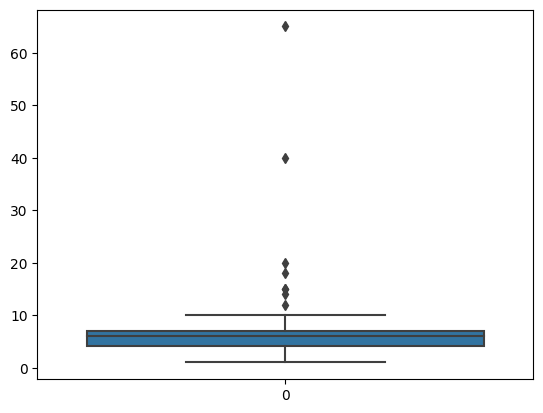

In [ ]:
sns.boxplot(data=df['penghasilan'])
plt.show()

---
Di atas 40 juta nampak berbeda jauh sehingga akan dipisah

In [ ]:
df.shape

(110, 13)

In [ ]:
df_ori = df.copy()
df = df[df['penghasilan']<40]

In [ ]:
df.nlargest(5, 'penghasilan')

,tahun masuk,tahun wisuda,status,dapat kerja,lanjut studi,posisi kerja,tempat lanjut studi,prodi post s1,tahun buka usaha,jenis usaha,kesesuaian kurikulum,kesesuaian bidang,penghasilan
44,2009,2013,Non-PNS,3-6 Bulan,NaN,Field sales Manager,NaN,NaN,NaN,NaN,3,3,20.0
21,2015,2019,Non-PNS,Kurang dari 3 bulan.,2020,Data Scientist,IPB / Bogor,Statistika dan Sains Data,NaN,NaN,3,3,18.0
4,2013,2018,Non-PNS,Kurang dari 3 bulan.,2021,Control Tower,ITS - Surabaya,Supply Chain,NaN,NaN,4,3,15.0
97,2006,2010,Non-PNS,3-6 Bulan,NaN,ETL Developer,NaN,NaN,NaN,NaN,5,5,15.0
89,2006,2010,Non-PNS,Kurang dari 3 bulan.,NaN,Programmer,NaN,NaN,NaN,NaN,4,4,14.0


##Duplicating and Specifying DataFrames

---
Pembagian df ke masing-masing fokus subtopik

In [ ]:
df_usaha = df.copy()
df_studi = df.copy()

In [ ]:
df_usaha = df_usaha.dropna(subset=['tahun buka usaha', 'penghasilan'])
df_usaha.isna().sum()

tahun masuk             0
tahun wisuda            0
status                  0
dapat kerja             0
lanjut studi            5
posisi kerja            3
tempat lanjut studi     5
prodi post s1           5
tahun buka usaha        0
jenis usaha             1
kesesuaian kurikulum    0
kesesuaian bidang       0
penghasilan             0
dtype: int64

In [ ]:
df_usaha['lanjut studi'] = df_usaha['lanjut studi'].astype('str')
df_usaha['lanjut studi'] = df_usaha['lanjut studi'].fillna("Tidak Lanjut")
df_usaha['lanjut studi'] = df_usaha['lanjut studi'].replace('nan', 'Tidak Lanjut')
df_usaha['lanjut studi'] = df_usaha['lanjut studi'].replace('-', 'Tidak Lanjut')
df_usaha['lanjut studi'] = df_usaha['lanjut studi'].astype('category')
df_usaha['tempat lanjut studi'] = df_usaha['tempat lanjut studi'].astype('str')
df_usaha['tempat lanjut studi'] = df_usaha['tempat lanjut studi'].fillna("Tidak Tersedia")
df_usaha['tempat lanjut studi'] = df_usaha['tempat lanjut studi'].replace('nan', 'Tidak Tersedia')
df_usaha['tempat lanjut studi'] = df_usaha['tempat lanjut studi'].replace('-', 'Tidak Tersedia')
df_usaha['tempat lanjut studi'] = df_usaha['tempat lanjut studi'].astype('category')
df_usaha['posisi kerja'] = df_usaha['posisi kerja'].astype('str')
df_usaha['posisi kerja'] = df_usaha['posisi kerja'].fillna("Tidak Tersedia")
df_usaha['posisi kerja'] = df_usaha['posisi kerja'].replace('nan', 'Tidak Tersedia')
df_usaha['posisi kerja'] = df_usaha['posisi kerja'].replace('-', 'Tidak Tersedia')
df_usaha['posisi kerja'] = df_usaha['posisi kerja'].astype('category')
df_usaha['prodi post s1'] = df_usaha['prodi post s1'].astype('str')
df_usaha['prodi post s1'] = df_usaha['prodi post s1'].fillna("Tidak Tersedia")
df_usaha['prodi post s1'] = df_usaha['prodi post s1'].replace('nan', 'Tidak Tersedia')
df_usaha['prodi post s1'] = df_usaha['prodi post s1'].replace('-', 'Tidak Tersedia')
df_usaha['prodi post s1'] = df_usaha['prodi post s1'].astype('category')
df_usaha['jenis usaha'] = df_usaha['jenis usaha'].astype('str')
df_usaha['jenis usaha'] = df_usaha['jenis usaha'].fillna("Tidak Tersedia")
df_usaha['jenis usaha'] = df_usaha['jenis usaha'].replace('nan', 'Tidak Tersedia')
df_usaha['jenis usaha'] = df_usaha['jenis usaha'].replace('-', 'Tidak Tersedia')
df_usaha['jenis usaha'] = df_usaha['jenis usaha'].astype('category')

In [ ]:
df_usaha.shape

(10, 13)

In [ ]:
df_usaha['tahun buka usaha'] = df_usaha['tahun buka usaha'].astype('str')
df_usaha = df_usaha[(df_usaha['tahun buka usaha'] != '-')]
df_usaha = df_usaha[(df_usaha['tahun buka usaha'] != 'nan')]
df_usaha['tahun buka usaha'] = df_usaha['tahun buka usaha'].astype('int64')
df_usaha['tahun buka usaha'] = pd.to_datetime(df_usaha['tahun buka usaha'], format='%Y')
df_usaha['tahun buka usaha'] = df_usaha['tahun buka usaha'].dt.year

In [ ]:
df_usaha.dtypes

tahun masuk                int64
tahun wisuda               int64
status                  category
dapat kerja             category
lanjut studi            category
posisi kerja            category
tempat lanjut studi     category
prodi post s1           category
tahun buka usaha           int64
jenis usaha             category
kesesuaian kurikulum    category
kesesuaian bidang       category
penghasilan              float64
dtype: object

In [ ]:
df_usaha.head()

,tahun masuk,tahun wisuda,status,dapat kerja,lanjut studi,posisi kerja,tempat lanjut studi,prodi post s1,tahun buka usaha,jenis usaha,kesesuaian kurikulum,kesesuaian bidang,penghasilan
70,2003,2007,Wirausaha,Kurang dari 3 bulan.,Tidak Lanjut,Tidak Tersedia,Tidak Tersedia,Tidak Tersedia,2017,Retail,4,4,2.0
71,2012,2017,Wirausaha,Wirausaha,Tidak Lanjut,Owner,Tidak Tersedia,Tidak Tersedia,2018,"Wadah kredit angsuran dan investasi syariah, j...",3,3,12.0
72,2012,2016,Wirausaha,Kurang dari 3 bulan.,Tidak Lanjut,Cambridge A Level Mathematics Teacher,Tidak Tersedia,Tidak Tersedia,2019,Jasa Privat dan Bimbingan Belajar Zhofir Tutors,4,4,8.0
83,2003,2007,Wirausaha,Kurang dari 3 bulan.,Tidak Lanjut,Tidak Tersedia,Tidak Tersedia,Tidak Tersedia,2012,"Retail furniture kayu, produksi dan penjualan ...",2,1,5.0
84,2017,2022,Non-PNS,Kurang dari 3 bulan.,Tidak Lanjut,Data Analyst,Tidak Tersedia,Tidak Tersedia,2019,Online shop dibidang fashion,5,5,6.0


In [ ]:
df_usaha.shape

(7, 13)

In [ ]:
df_studi = df_studi.dropna(subset=['lanjut studi'])
df_studi.isna().sum()

tahun masuk              0
tahun wisuda             0
status                   0
dapat kerja              0
lanjut studi             0
posisi kerja             1
tempat lanjut studi      0
prodi post s1            0
tahun buka usaha        10
jenis usaha             10
kesesuaian kurikulum     0
kesesuaian bidang        0
penghasilan              0
dtype: int64

In [ ]:
df_studi['posisi kerja'] = df_studi['posisi kerja'].astype('str')
df_studi['posisi kerja'] = df_studi['posisi kerja'].fillna("Tidak Disediakan")
df_studi['posisi kerja'] = df_studi['posisi kerja'].replace('nan', 'Tidak Disediakan')
df_studi['posisi kerja'] = df_studi['posisi kerja'].astype('category')
df_studi['tahun buka usaha'] = df_studi['tahun buka usaha'].astype('str')
df_studi['tahun buka usaha'] = df_studi['tahun buka usaha'].fillna("Tidak Buka Usaha")
df_studi['tahun buka usaha'] = df_studi['tahun buka usaha'].replace('nan', 'Tidak Buka Usaha')
df_studi['tahun buka usaha'] = df_studi['tahun buka usaha'].astype('category')
df_studi['jenis usaha'] = df_studi['jenis usaha'].astype('str')
df_studi['jenis usaha'] = df_studi['jenis usaha'].fillna("Tidak Buka Usaha")
df_studi['jenis usaha'] = df_studi['jenis usaha'].replace('nan', 'Tidak Buka Usaha')
df_studi['jenis usaha'] = df_studi['jenis usaha'].astype('category')

<ipython-input-48-a62943218bdf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_studi['posisi kerja'] = df_studi['posisi kerja'].astype('str')
<ipython-input-48-a62943218bdf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_studi['posisi kerja'] = df_studi['posisi kerja'].fillna("Tidak Disediakan")
<ipython-input-48-a62943218bdf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

In [ ]:
df_studi.dtypes

tahun masuk                int64
tahun wisuda               int64
status                  category
dapat kerja             category
lanjut studi              object
posisi kerja            category
tempat lanjut studi     category
prodi post s1           category
tahun buka usaha        category
jenis usaha             category
kesesuaian kurikulum    category
kesesuaian bidang       category
penghasilan              float64
dtype: object

In [ ]:
df_studi['tahun buka usaha']

0      Tidak Buka Usaha
2      Tidak Buka Usaha
4      Tidak Buka Usaha
10                    -
17                    -
20     Tidak Buka Usaha
21     Tidak Buka Usaha
46     Tidak Buka Usaha
59     Tidak Buka Usaha
67                    -
71                 2018
88     Tidak Buka Usaha
90     Tidak Buka Usaha
94     Tidak Buka Usaha
101                2018
Name: tahun buka usaha, dtype: category
Categories (3, object): ['-', '2018', 'Tidak Buka Usaha']

In [ ]:
df_studi.head(1)

,tahun masuk,tahun wisuda,status,dapat kerja,lanjut studi,posisi kerja,tempat lanjut studi,prodi post s1,tahun buka usaha,jenis usaha,kesesuaian kurikulum,kesesuaian bidang,penghasilan
0,2004,2010,ASN/PNS,Kurang dari 3 bulan.,2014,Guru Kelas,Universitas Terbuka,Pendidikan Guru Sekolah Dasar,Tidak Buka Usaha,Tidak Buka Usaha,3,3,4.0


##Job Data

In [ ]:
df['tahun buka usaha'] = df['tahun buka usaha'].astype('str')
df['tahun buka usaha'] = df['tahun buka usaha'].fillna("Tidak Buka Usaha")
df['tahun buka usaha'] = df['tahun buka usaha'].replace('nan', 'Tidak Buka Usaha')
df['tahun buka usaha'] = df['tahun buka usaha'].astype('category')

In [ ]:
df = df.rename(columns={'tahun buka usaha': 'buka usaha'})
df['buka usaha'] = df['buka usaha'].apply(lambda x: "Tidak Buka Usaha" if x == "Tidak Buka Usaha" else "Buka Usaha")

In [ ]:
df['lanjut studi'] = df['lanjut studi'].astype('str')
df['lanjut studi'] = df['lanjut studi'].fillna("Tidak Lanjut")
df['lanjut studi'] = df['lanjut studi'].replace('nan', 'Tidak Lanjut')
df['lanjut studi'] = df['lanjut studi'].replace('-', 'Tidak Lanjut')
df['lanjut studi'] = df['lanjut studi'].astype('category')

In [ ]:
df['lanjut studi'] = df['lanjut studi'].apply(lambda x: "Tidak Lanjut" if x == "Tidak Lanjut" else "Lanjut")

In [ ]:
df_pns = df.copy()
df_pns.drop(['tempat lanjut studi', 'prodi post s1', 'jenis usaha'], axis=1, inplace=True)

In [ ]:
df_pns['posisi kerja'] = df_pns['posisi kerja'].astype('str')
df_pns['posisi kerja'] = df_pns['posisi kerja'].fillna("Tidak Disediakan")
df_pns['posisi kerja'] = df_pns['posisi kerja'].replace('nan', 'Tidak Disediakan')
df_pns['posisi kerja'] = df_pns['posisi kerja'].astype('category')

In [ ]:
df_pns.dtypes

tahun masuk                int64
tahun wisuda               int64
status                  category
dapat kerja             category
lanjut studi              object
posisi kerja            category
buka usaha                object
kesesuaian kurikulum    category
kesesuaian bidang       category
penghasilan              float64
dtype: object

In [ ]:
df_pns.shape

(64, 10)

In [ ]:
df_pns.head()

,tahun masuk,tahun wisuda,status,dapat kerja,lanjut studi,posisi kerja,buka usaha,kesesuaian kurikulum,kesesuaian bidang,penghasilan
0,2004,2010,ASN/PNS,Kurang dari 3 bulan.,Lanjut,Guru Kelas,Tidak Buka Usaha,3,3,4.0
1,2015,2020,ASN/PNS,6-12 bulan,Tidak Lanjut,Tidak Disediakan,Tidak Buka Usaha,3,3,6.0
2,2000,2006,ASN/PNS,Kurang dari 3 bulan.,Lanjut,Dosen,Tidak Buka Usaha,5,5,5.0
3,2014,2019,Non-PNS,6-12 bulan,Tidak Lanjut,Officer HC Solution Analysis Support,Tidak Buka Usaha,3,3,8.0
4,2013,2018,Non-PNS,Kurang dari 3 bulan.,Lanjut,Control Tower,Tidak Buka Usaha,4,3,15.0


##Column 'lama studi' Added

---
Berdasarkan tahun wisuda dikurang tahun masuk sehingga 4 berarti 6-7 semester, 5 berarti 8-9 semester, dan seterusnya

In [ ]:
df['lama studi'] = df['tahun wisuda'] - df['tahun masuk']
df.head()

,tahun masuk,tahun wisuda,status,dapat kerja,lanjut studi,posisi kerja,tempat lanjut studi,prodi post s1,buka usaha,jenis usaha,kesesuaian kurikulum,kesesuaian bidang,penghasilan,lama studi
0,2004,2010,ASN/PNS,Kurang dari 3 bulan.,Lanjut,Guru Kelas,Universitas Terbuka,Pendidikan Guru Sekolah Dasar,Tidak Buka Usaha,NaN,3,3,4.0,6
1,2015,2020,ASN/PNS,6-12 bulan,Tidak Lanjut,NaN,NaN,NaN,Tidak Buka Usaha,NaN,3,3,6.0,5
2,2000,2006,ASN/PNS,Kurang dari 3 bulan.,Lanjut,Dosen,S2 UI dan S3 IPB,Magister Teknologi Informasi dan Doktoral Ilmu...,Tidak Buka Usaha,NaN,5,5,5.0,6
3,2014,2019,Non-PNS,6-12 bulan,Tidak Lanjut,Officer HC Solution Analysis Support,NaN,NaN,Tidak Buka Usaha,NaN,3,3,8.0,5
4,2013,2018,Non-PNS,Kurang dari 3 bulan.,Lanjut,Control Tower,ITS - Surabaya,Supply Chain,Tidak Buka Usaha,NaN,4,3,15.0,5


In [ ]:
df_studi['lama studi'] = df_studi['tahun wisuda'] - df_studi['tahun masuk']
df_studi.head()

,tahun masuk,tahun wisuda,status,dapat kerja,lanjut studi,posisi kerja,tempat lanjut studi,prodi post s1,tahun buka usaha,jenis usaha,kesesuaian kurikulum,kesesuaian bidang,penghasilan,lama studi
0,2004,2010,ASN/PNS,Kurang dari 3 bulan.,2014,Guru Kelas,Universitas Terbuka,Pendidikan Guru Sekolah Dasar,Tidak Buka Usaha,Tidak Buka Usaha,3,3,4.0,6
2,2000,2006,ASN/PNS,Kurang dari 3 bulan.,S2 2008 dan S3 2020,Dosen,S2 UI dan S3 IPB,Magister Teknologi Informasi dan Doktoral Ilmu...,Tidak Buka Usaha,Tidak Buka Usaha,5,5,5.0,6
4,2013,2018,Non-PNS,Kurang dari 3 bulan.,2021,Control Tower,ITS - Surabaya,Supply Chain,Tidak Buka Usaha,Tidak Buka Usaha,4,3,15.0,5
10,2009,2015,Non-PNS,Kurang dari 3 bulan.,-,Sekretaris Yayasan & Administrasi Kependidikan,-,-,-,-,5,3,5.0,6
17,2019,2023,Non-PNS,Kurang dari 3 bulan.,-,Penulis,-,-,-,-,3,2,5.0,4


In [ ]:
df_usaha['lama studi'] = df_usaha['tahun wisuda'] - df_usaha['tahun masuk']
df_usaha.head()

,tahun masuk,tahun wisuda,status,dapat kerja,lanjut studi,posisi kerja,tempat lanjut studi,prodi post s1,tahun buka usaha,jenis usaha,kesesuaian kurikulum,kesesuaian bidang,penghasilan,lama studi
70,2003,2007,Wirausaha,Kurang dari 3 bulan.,Tidak Lanjut,Tidak Tersedia,Tidak Tersedia,Tidak Tersedia,2017,Retail,4,4,2.0,4
71,2012,2017,Wirausaha,Wirausaha,Tidak Lanjut,Owner,Tidak Tersedia,Tidak Tersedia,2018,"Wadah kredit angsuran dan investasi syariah, j...",3,3,12.0,5
72,2012,2016,Wirausaha,Kurang dari 3 bulan.,Tidak Lanjut,Cambridge A Level Mathematics Teacher,Tidak Tersedia,Tidak Tersedia,2019,Jasa Privat dan Bimbingan Belajar Zhofir Tutors,4,4,8.0,4
83,2003,2007,Wirausaha,Kurang dari 3 bulan.,Tidak Lanjut,Tidak Tersedia,Tidak Tersedia,Tidak Tersedia,2012,"Retail furniture kayu, produksi dan penjualan ...",2,1,5.0,4
84,2017,2022,Non-PNS,Kurang dari 3 bulan.,Tidak Lanjut,Data Analyst,Tidak Tersedia,Tidak Tersedia,2019,Online shop dibidang fashion,5,5,6.0,5


In [ ]:
df_pns['lama studi'] = df_pns['tahun wisuda'] - df_pns['tahun masuk']
df_pns.head()

,tahun masuk,tahun wisuda,status,dapat kerja,lanjut studi,posisi kerja,buka usaha,kesesuaian kurikulum,kesesuaian bidang,penghasilan,lama studi
0,2004,2010,ASN/PNS,Kurang dari 3 bulan.,Lanjut,Guru Kelas,Tidak Buka Usaha,3,3,4.0,6
1,2015,2020,ASN/PNS,6-12 bulan,Tidak Lanjut,Tidak Disediakan,Tidak Buka Usaha,3,3,6.0,5
2,2000,2006,ASN/PNS,Kurang dari 3 bulan.,Lanjut,Dosen,Tidak Buka Usaha,5,5,5.0,6
3,2014,2019,Non-PNS,6-12 bulan,Tidak Lanjut,Officer HC Solution Analysis Support,Tidak Buka Usaha,3,3,8.0,5
4,2013,2018,Non-PNS,Kurang dari 3 bulan.,Lanjut,Control Tower,Tidak Buka Usaha,4,3,15.0,5


In [ ]:
df_studi.shape

(15, 14)

##Cross Check

In [ ]:
df.shape

(64, 14)

In [ ]:
df_usaha.shape

(7, 14)

In [ ]:
df_studi.shape

(15, 14)

In [ ]:
df_pns.shape

(64, 11)

#Plotting

##Trivial Understanding

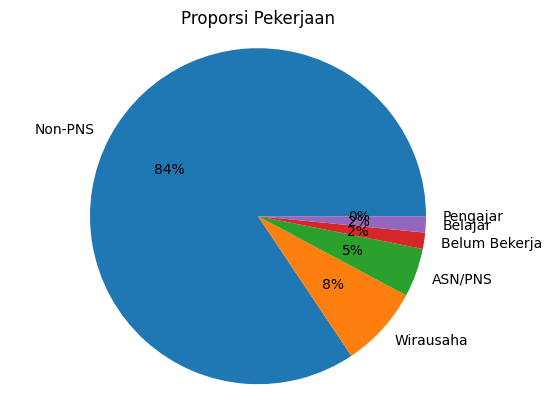

In [ ]:
plt.pie(df['status'].value_counts(), labels=df['status'].value_counts().index, autopct='%1.0f%%')
plt.axis('equal')
plt.title("Proporsi Pekerjaan")
plt.show()

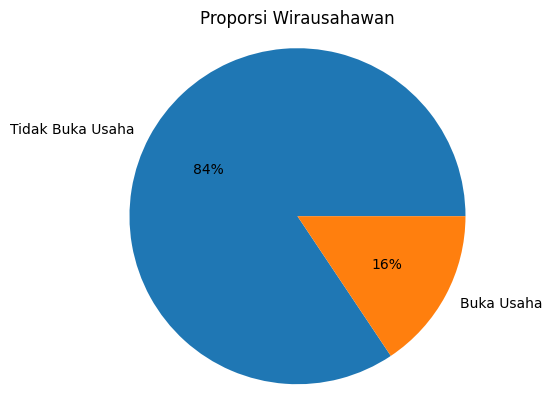

In [ ]:
plt.pie(df['buka usaha'].value_counts(), labels=df['buka usaha'].value_counts().index, autopct='%1.0f%%')
plt.axis('equal')
plt.title("Proporsi Wirausahawan")
plt.show()

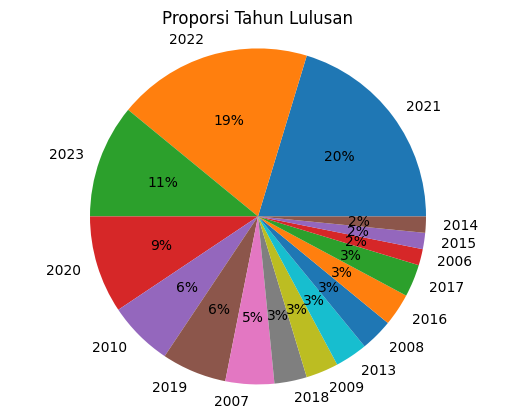

In [ ]:
plt.pie(df['tahun wisuda'].value_counts(), labels=df['tahun wisuda'].value_counts().index, autopct='%1.0f%%')
plt.axis('equal')
plt.title("Proporsi Tahun Lulusan")
plt.show()

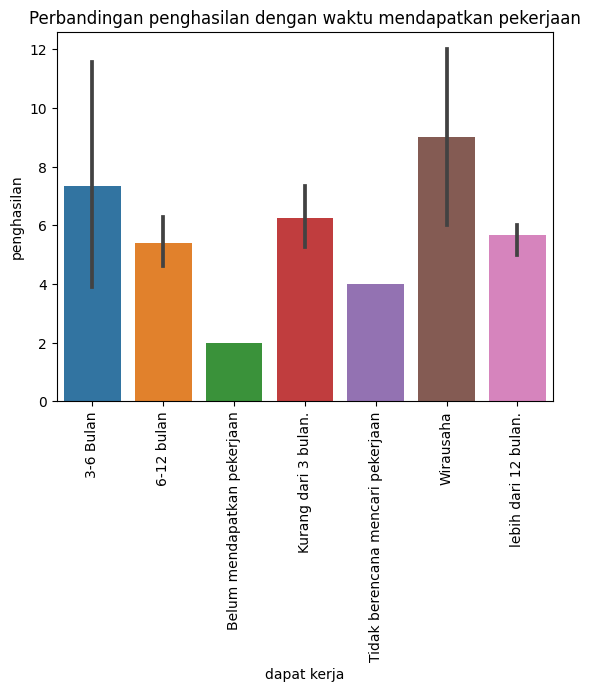

In [ ]:
sns.barplot(data=df, x='dapat kerja', y='penghasilan')
plt.xticks(rotation=90)
plt.title('Perbandingan penghasilan dengan waktu mendapatkan pekerjaan')
plt.show()

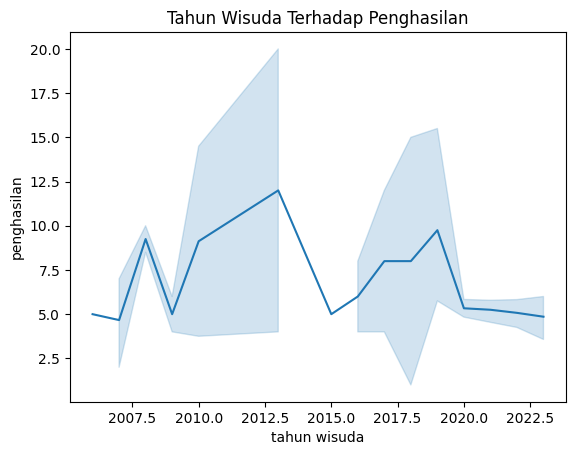

In [ ]:
sns.lineplot(x=df['tahun wisuda'], y=df['penghasilan'])
plt.title('Tahun Wisuda Terhadap Penghasilan')
plt.show()

##Lama Studi

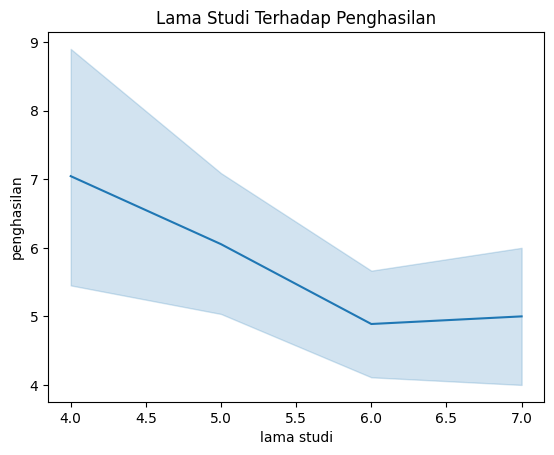

In [ ]:
sns.lineplot(data=df, x='lama studi', y='penghasilan')
plt.title('Lama Studi Terhadap Penghasilan')
plt.show()

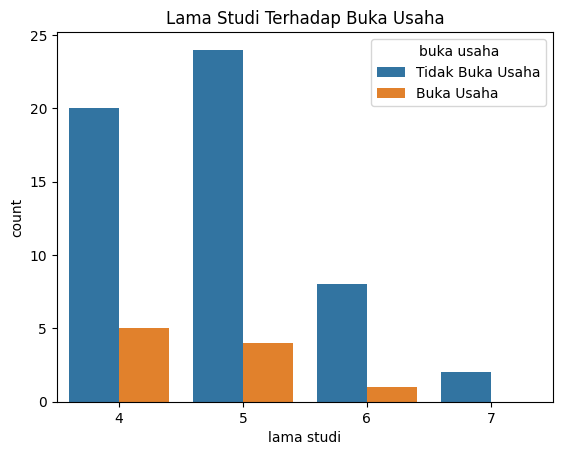

In [ ]:
sns.countplot(data=df, x='lama studi', hue='buka usaha')
plt.title('Lama Studi Terhadap Buka Usaha')
plt.show()

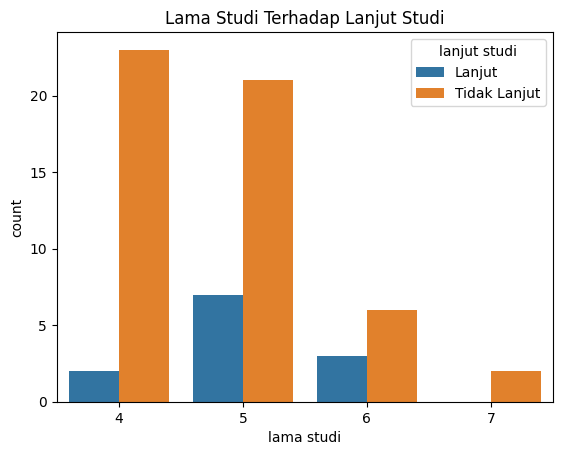

In [ ]:
sns.countplot(data=df, x='lama studi', hue='lanjut studi')
plt.title('Lama Studi Terhadap Lanjut Studi')
plt.show()

##Pekerjaan

In [ ]:
df_pns.head()

,tahun masuk,tahun wisuda,status,dapat kerja,lanjut studi,posisi kerja,buka usaha,kesesuaian kurikulum,kesesuaian bidang,penghasilan,lama studi
0,2004,2010,ASN/PNS,Kurang dari 3 bulan.,Lanjut,Guru Kelas,Tidak Buka Usaha,3,3,4.0,6
1,2015,2020,ASN/PNS,6-12 bulan,Tidak Lanjut,Tidak Disediakan,Tidak Buka Usaha,3,3,6.0,5
2,2000,2006,ASN/PNS,Kurang dari 3 bulan.,Lanjut,Dosen,Tidak Buka Usaha,5,5,5.0,6
3,2014,2019,Non-PNS,6-12 bulan,Tidak Lanjut,Officer HC Solution Analysis Support,Tidak Buka Usaha,3,3,8.0,5
4,2013,2018,Non-PNS,Kurang dari 3 bulan.,Lanjut,Control Tower,Tidak Buka Usaha,4,3,15.0,5


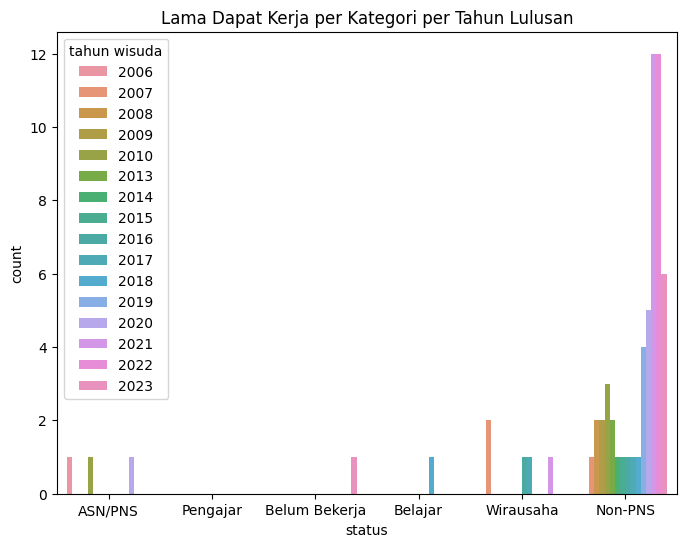

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df_pns, x='status', hue='tahun wisuda')
plt.grid(False)
plt.title("Lama Dapat Kerja per Kategori per Tahun Lulusan")
plt.show()

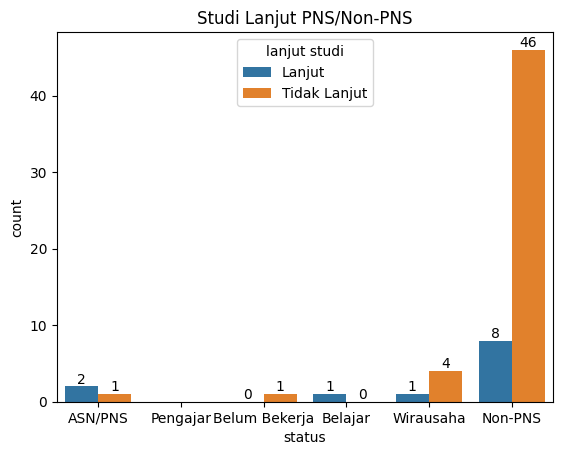

In [ ]:
ax = sns.countplot(data=df_pns, x='status', hue='lanjut studi')
for container in ax.containers:
  ax.bar_label(container)
plt.grid(False)
plt.title("Studi Lanjut PNS/Non-PNS")
plt.show()

##Studi Lanjut

In [ ]:
df_studi.head()

,tahun masuk,tahun wisuda,status,dapat kerja,lanjut studi,posisi kerja,tempat lanjut studi,prodi post s1,tahun buka usaha,jenis usaha,kesesuaian kurikulum,kesesuaian bidang,penghasilan,lama studi
0,2004,2010,ASN/PNS,Kurang dari 3 bulan.,2014,Guru Kelas,Universitas Terbuka,Pendidikan Guru Sekolah Dasar,Tidak Buka Usaha,Tidak Buka Usaha,3,3,4.0,6
2,2000,2006,ASN/PNS,Kurang dari 3 bulan.,S2 2008 dan S3 2020,Dosen,S2 UI dan S3 IPB,Magister Teknologi Informasi dan Doktoral Ilmu...,Tidak Buka Usaha,Tidak Buka Usaha,5,5,5.0,6
4,2013,2018,Non-PNS,Kurang dari 3 bulan.,2021,Control Tower,ITS - Surabaya,Supply Chain,Tidak Buka Usaha,Tidak Buka Usaha,4,3,15.0,5
10,2009,2015,Non-PNS,Kurang dari 3 bulan.,-,Sekretaris Yayasan & Administrasi Kependidikan,-,-,-,-,5,3,5.0,6
17,2019,2023,Non-PNS,Kurang dari 3 bulan.,-,Penulis,-,-,-,-,3,2,5.0,4


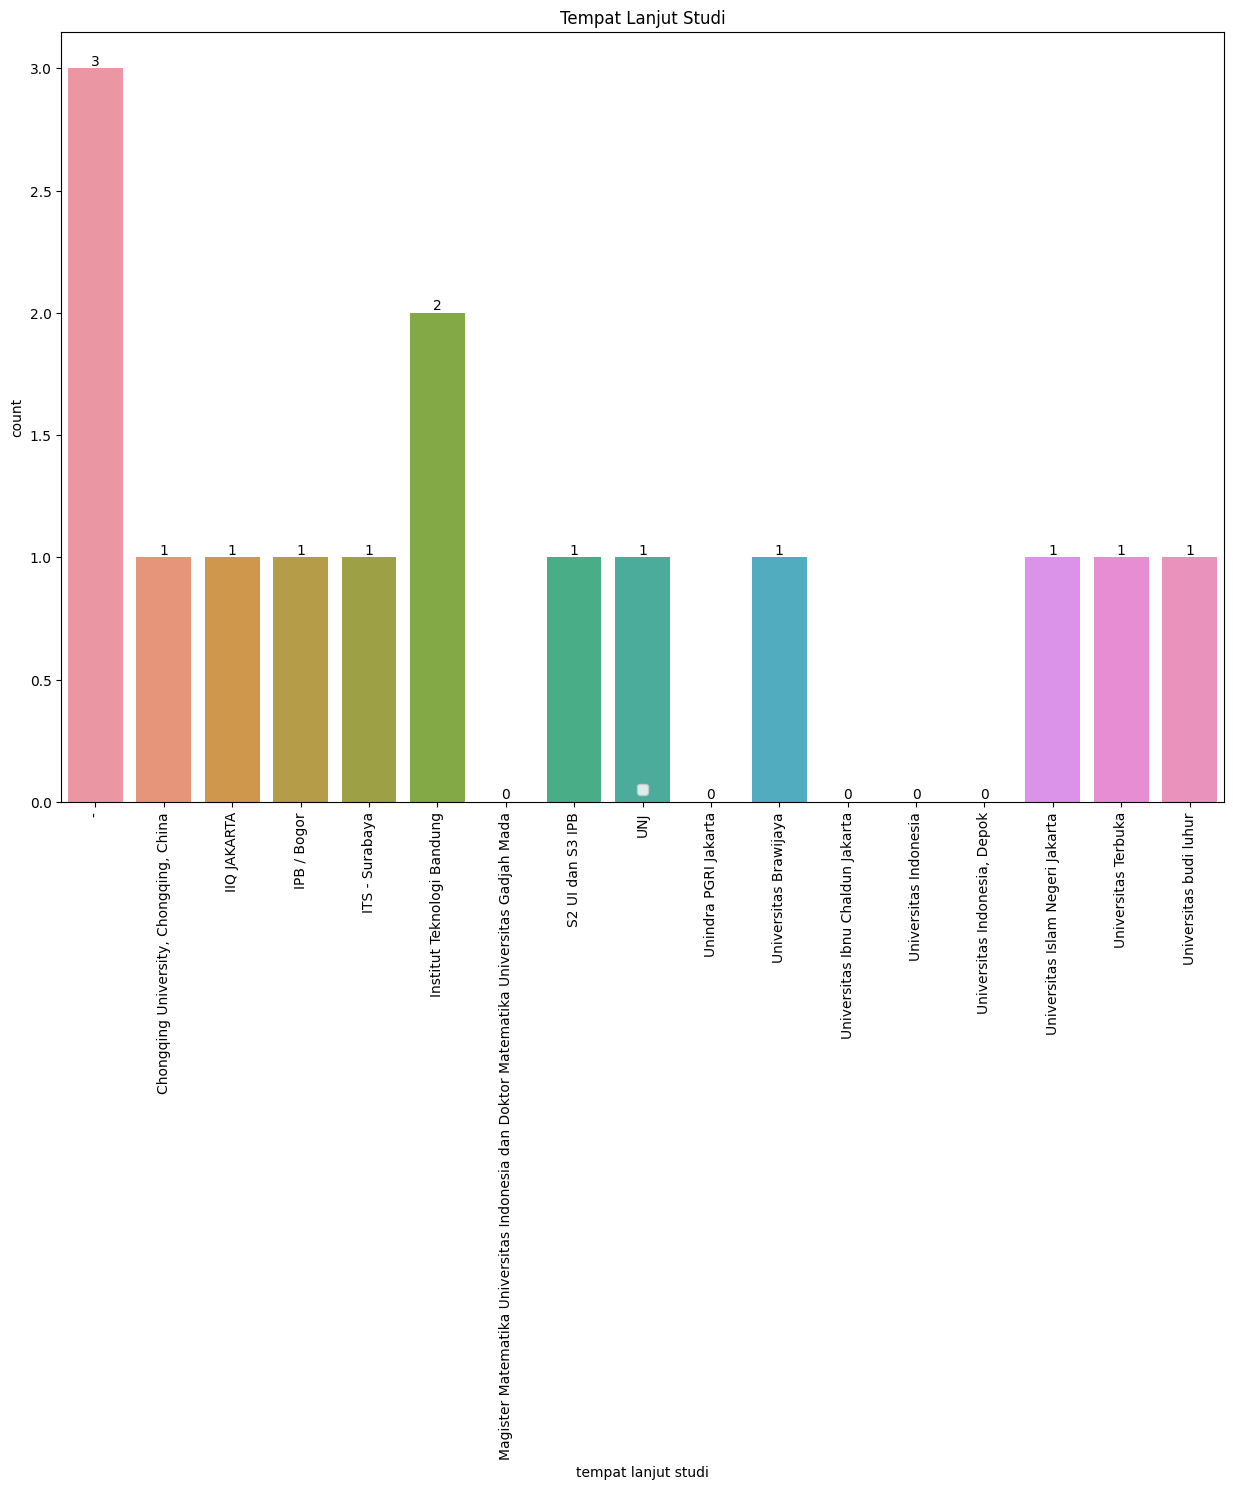

In [ ]:
plt.figure(figsize=(15, 10))
ax = sns.countplot(data=df_studi, x='tempat lanjut studi')
for container in ax.containers:
  ax.bar_label(container)
plt.grid(False)
plt.title("Tempat Lanjut Studi")
ax.legend(loc='lower center')
plt.xticks(rotation=90)
plt.show()

##Wirausahawan

In [ ]:
df_usaha.head()

,tahun masuk,tahun wisuda,status,dapat kerja,lanjut studi,posisi kerja,tempat lanjut studi,prodi post s1,tahun buka usaha,jenis usaha,kesesuaian kurikulum,kesesuaian bidang,penghasilan,lama studi
70,2003,2007,Wirausaha,Kurang dari 3 bulan.,Tidak Lanjut,Tidak Tersedia,Tidak Tersedia,Tidak Tersedia,2017,Retail,4,4,2.0,4
71,2012,2017,Wirausaha,Wirausaha,Tidak Lanjut,Owner,Tidak Tersedia,Tidak Tersedia,2018,"Wadah kredit angsuran dan investasi syariah, j...",3,3,12.0,5
72,2012,2016,Wirausaha,Kurang dari 3 bulan.,Tidak Lanjut,Cambridge A Level Mathematics Teacher,Tidak Tersedia,Tidak Tersedia,2019,Jasa Privat dan Bimbingan Belajar Zhofir Tutors,4,4,8.0,4
83,2003,2007,Wirausaha,Kurang dari 3 bulan.,Tidak Lanjut,Tidak Tersedia,Tidak Tersedia,Tidak Tersedia,2012,"Retail furniture kayu, produksi dan penjualan ...",2,1,5.0,4
84,2017,2022,Non-PNS,Kurang dari 3 bulan.,Tidak Lanjut,Data Analyst,Tidak Tersedia,Tidak Tersedia,2019,Online shop dibidang fashion,5,5,6.0,5


#Clustering

In [ ]:
from sklearn import cluster, datasets
from sklearn.metrics import silhouette_score as siluet
from sklearn.metrics.cluster import homogeneity_score as purity
from sklearn.metrics import normalized_mutual_info_score as NMI

In [ ]:
X = df.copy()
X['tahun masuk'] = X['tahun masuk'].astype('category')
X['tahun wisuda'] = X['tahun wisuda'].astype('category')
X = pd.get_dummies(X, drop_first=True)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 0, 2, 0, 1, 0, 2, 0, 0, 2], dtype=int32)

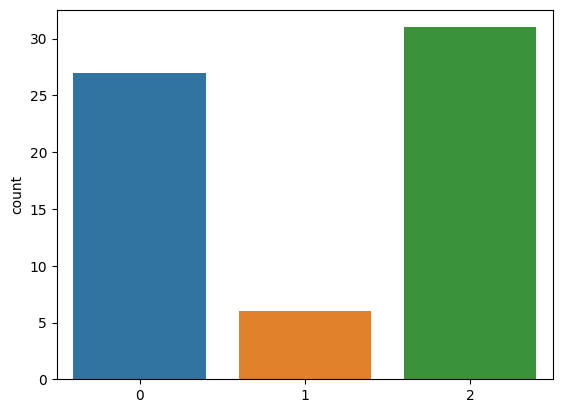

In [ ]:
# k-means++ clustering http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
k=3
kmPP = cluster.KMeans(n_clusters=k, init='k-means++')
kmPP.fit(X)
C_kmpp = kmPP.predict(X)

sns.countplot(x=C_kmpp)
C_kmpp[:10]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0.5, 1.0, 'Elbow curve')

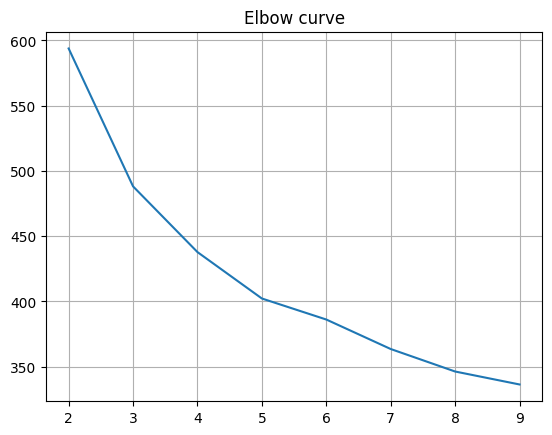

In [ ]:
distorsions, k1, kN = [], 2, 10
for k in range(k1, kN):
    kmPP = cluster.KMeans(n_clusters=k, init='k-means++').fit(X)
    distorsions.append(kmPP.inertia_)

plt.plot(range(k1, kN), distorsions); plt.grid(True)
plt.title('Elbow curve')

In [ ]:
X.dtypes

penghasilan               float64
lama studi                  int64
tahun masuk_2003            uint8
tahun masuk_2004            uint8
tahun masuk_2005            uint8
                           ...   
kesesuaian kurikulum_5      uint8
kesesuaian bidang_2         uint8
kesesuaian bidang_3         uint8
kesesuaian bidang_4         uint8
kesesuaian bidang_5         uint8
Length: 160, dtype: object

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 3, 0, 2, 1, 3, 3, 2, 3, 0], dtype=int32)

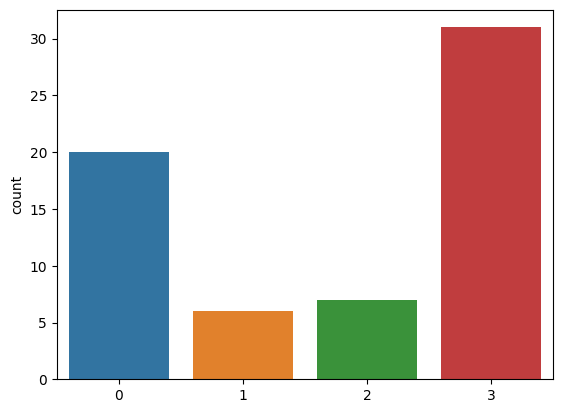

In [ ]:
# k-means++ clustering http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
k=4
kmPP = cluster.KMeans(n_clusters=k, init='k-means++')
kmPP.fit(X)
C_kmpp = kmPP.predict(X)

sns.countplot(x=C_kmpp)
C_kmpp[:10]

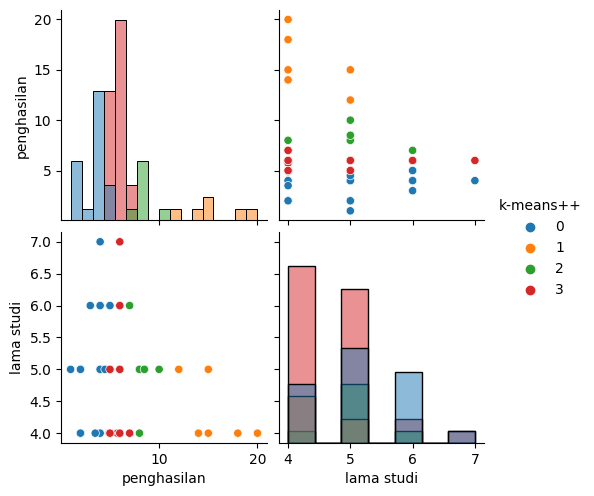

In [ ]:
X['k-means++'] = C_kmpp
fig = sns.pairplot(X[['penghasilan', 'lama studi', 'k-means++']], \
                   hue="k-means++", diag_kind="hist", palette="tab10")